<a href="https://colab.research.google.com/github/aymenzayene/roboticarm/blob/main/linearregressionBTS.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35 entries, 0 to 34
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   cx            35 non-null     int64  
 1   cy            35 non-null     int64  
 2   waist         35 non-null     float64
 3   shoulder      35 non-null     float64
 4   elbow         35 non-null     float64
 5   forearm_roll  35 non-null     float64
 6   wrist_angle   35 non-null     float64
 7   wrist_rotate  35 non-null     float64
 8   gripper       5 non-null      float64
 9   left_finger   2 non-null      float64
 10  right_finger  1 non-null      float64
dtypes: float64(9), int64(2)
memory usage: 3.1 KB


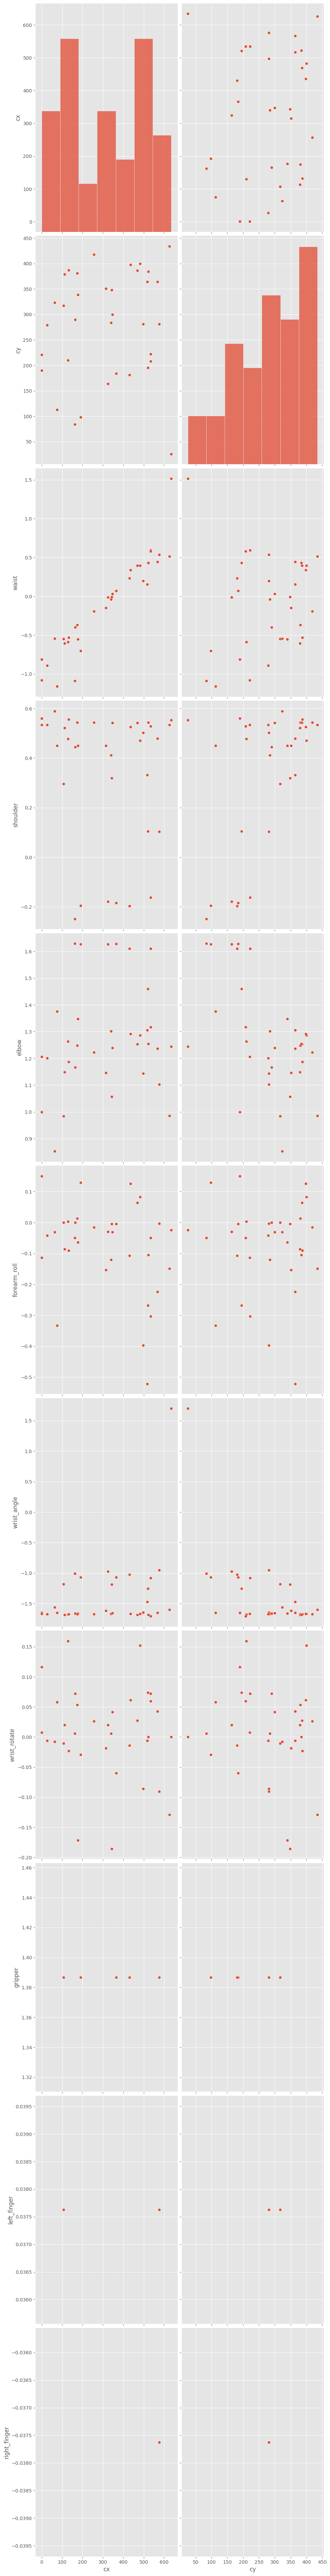

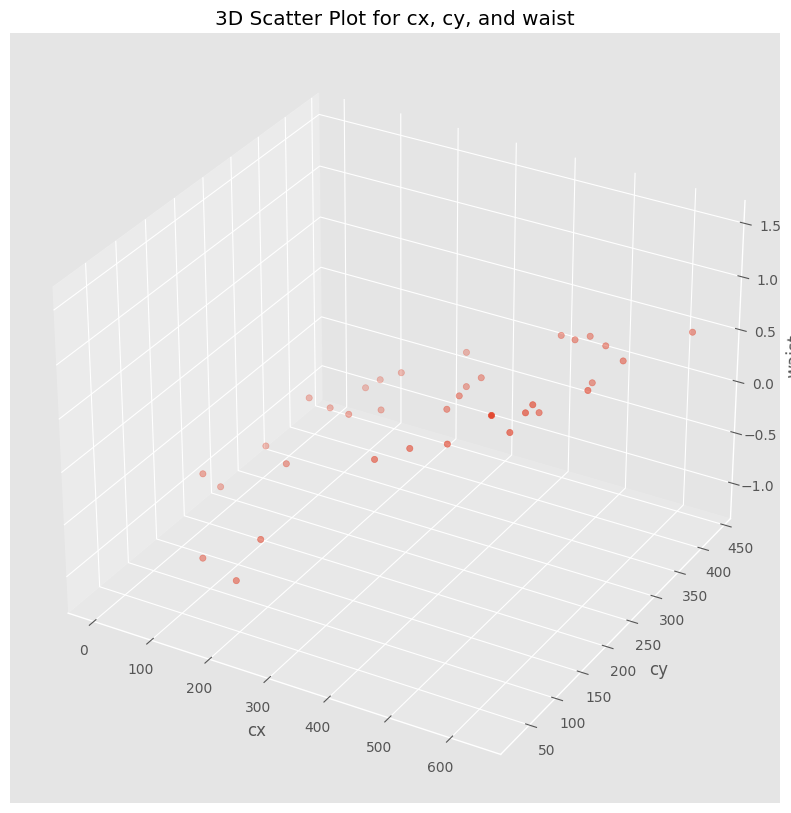

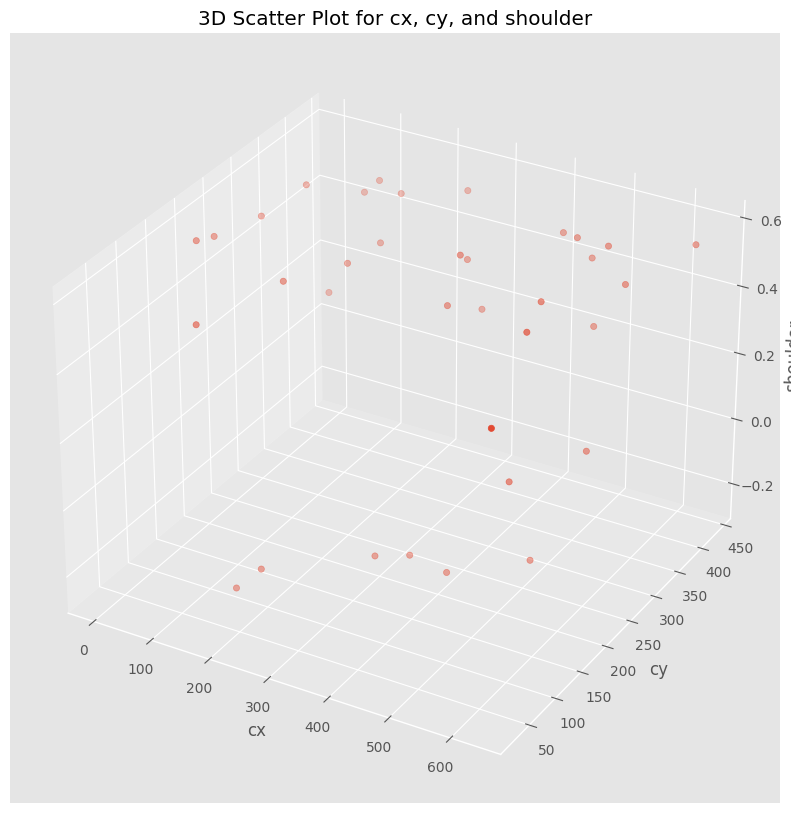

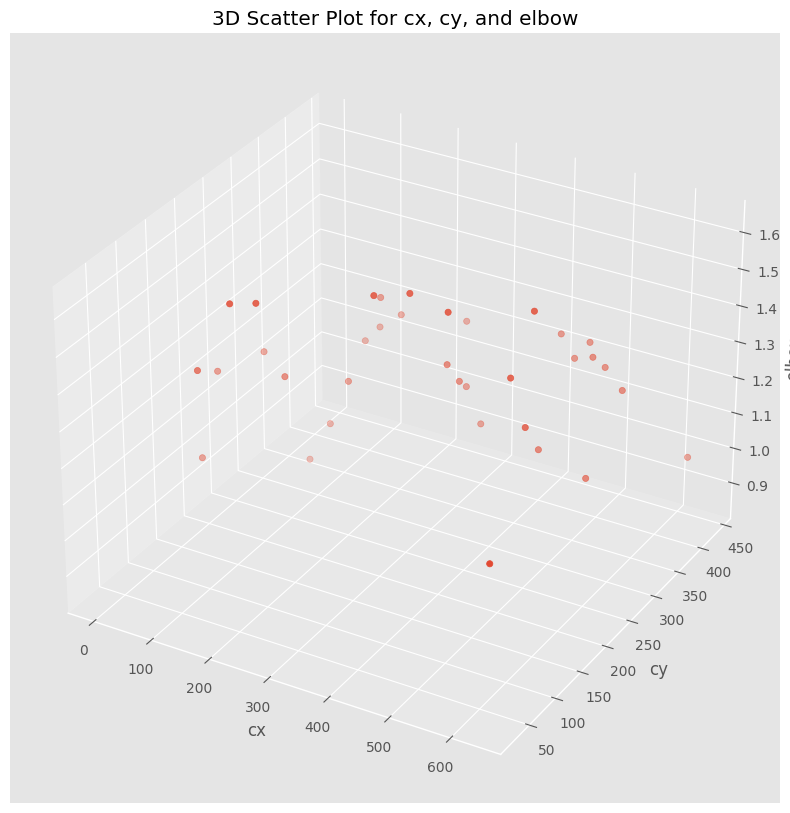

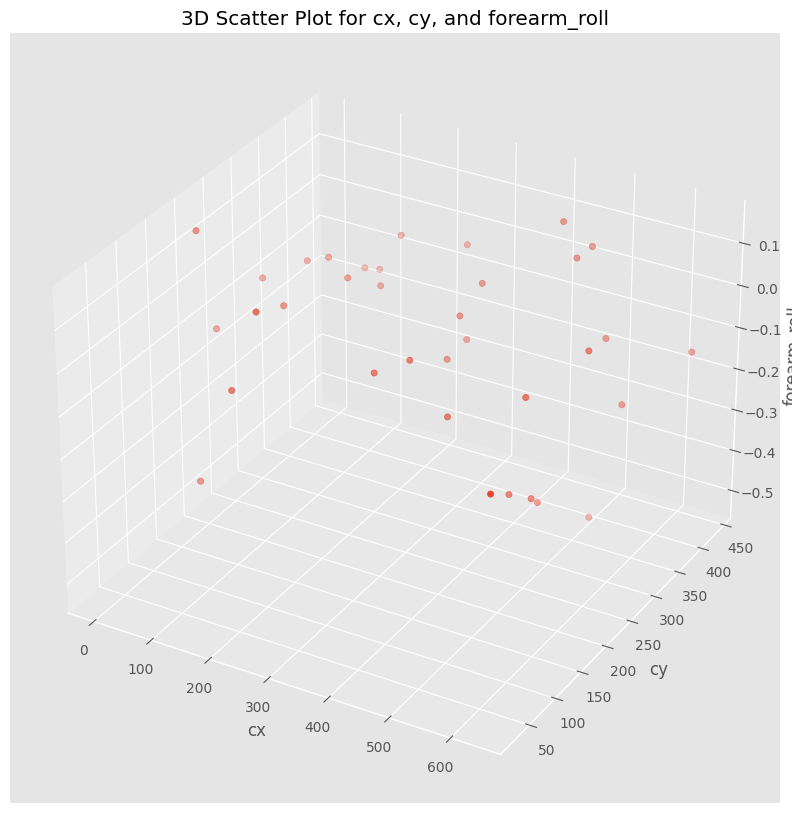

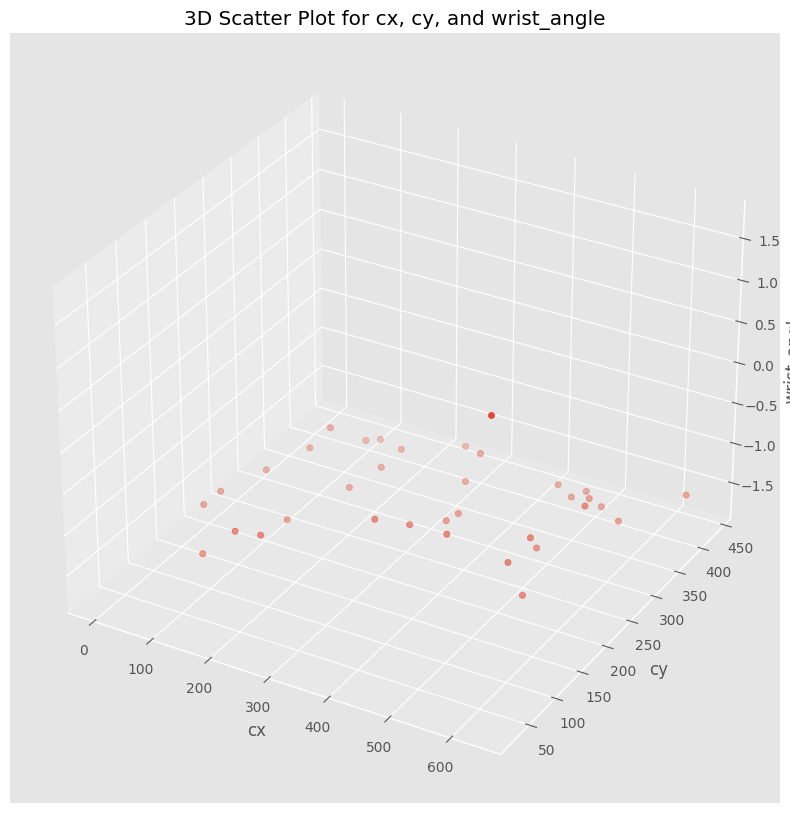

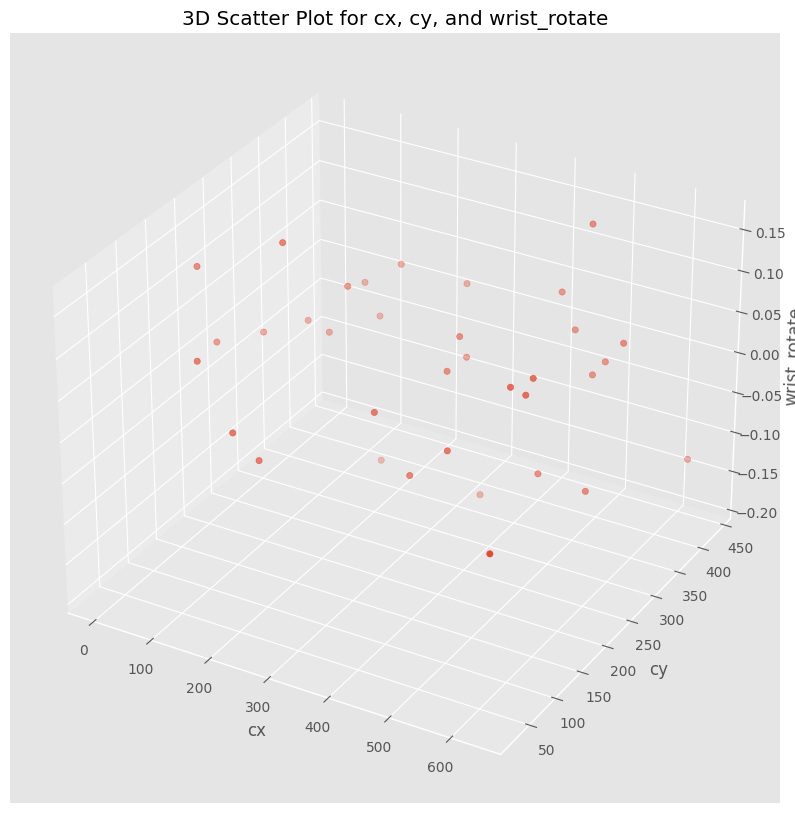

In [ ]:
# Import necessary libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from mpl_toolkits.mplot3d import Axes3D  # for 3D plotting

# Set the plot style and default figure size
plt.style.use("ggplot")
plt.rcParams['figure.figsize'] = (30, 10)

# Read the dataset
file_name = "/content/data20.csv"
df = pd.read_csv(file_name, sep=';', decimal=',')
df.drop(df.columns[[0]],axis=1,inplace=True)

# Display information about the dataset
df.info()

# Visualize relationships using pairplots
sns.pairplot(df, x_vars=['cx', 'cy'], height=7, aspect=0.7)

# List of body measurements for 3D scatter plots
body_measurements = ['waist', 'shoulder', 'elbow', 'forearm_roll', 'wrist_angle', 'wrist_rotate']

# Creating 3D scatter plots
for measurement in body_measurements:
    fig = plt.figure()
    ax = fig.add_subplot(111, projection='3d')
    ax.scatter(df['cx'], df['cy'], df[measurement])

    ax.set_xlabel('cx')
    ax.set_ylabel('cy')
    ax.set_zlabel(measurement)
    plt.title(f'3D Scatter Plot for cx, cy, and {measurement}')
    plt.show()


In [ ]:
# Import necessary libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from scipy.stats import skew

# Set the plot style and default figure size using matplotlib
import matplotlib.pyplot as plt
# Import machine learning libraries for linear regression from scikit-learn
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Specify the file path for the dataset
file_name = "/content/data20.csv"

# Read the dataset into a Pandas DataFrame with a specified separator and decimal format
df = pd.read_csv(file_name, sep=';', decimal=',')
# Drop the first column from the DataFrame (assuming it's not needed, indicated by the use of `inplace=True`)
df.drop(df.columns[[0]], axis=1, inplace=True)

# Display information about the dataset, such as column data types and missing values
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35 entries, 0 to 34
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   cx            35 non-null     int64  
 1   cy            35 non-null     int64  
 2   waist         35 non-null     float64
 3   shoulder      35 non-null     float64
 4   elbow         35 non-null     float64
 5   forearm_roll  35 non-null     float64
 6   wrist_angle   35 non-null     float64
 7   wrist_rotate  35 non-null     float64
 8   gripper       5 non-null      float64
 9   left_finger   2 non-null      float64
 10  right_finger  1 non-null      float64
dtypes: float64(9), int64(2)
memory usage: 3.1 KB


In [ ]:
from sklearn.linear_model import LinearRegression

# Extract features (cx and cy) and target variable (waist)
x = df[['cx', 'cy']]
y = df.waist

# Create a linear regression model
lm1 = LinearRegression()

# Fit the model to the data
lm1.fit(x, y)

# Print the intercept (b0)
print(f"Intercept b0: {lm1.intercept_}")
b0 = lm1.intercept_

# Print the coefficients (b1 and b2)
print(f"Coefficients (b1, b2): {lm1.coef_}")
b1 = lm1.coef_[0]
b2 = lm1.coef_[1]

# Print individual coefficients
print('b1:', b1)
print('b2:', b2)


Intercept b0: -0.9985510192217074
Coefficients (b1, b2): [ 2.84230400e-03 -1.88607768e-05]
b1: 0.002842303999468174
b2: -1.886077680943051e-05


In [ ]:
# Create a list of tuples using the zip function to pair each feature name with its corresponding coefficient from the linear regression model
# This line combines the feature names ('cx', 'cy') with the coefficients (lm1.coef_) and converts them into a list of tuples

list(zip(['cx','cy'],lm1.coef_))

[('cx', 0.002842303999468174), ('cy', -1.886077680943051e-05)]

In [ ]:
from sklearn.metrics import r2_score  # Import the R-squared (r2_score) metric from scikit-learn

# Create a new linear regression model (lm2) and fit it to the features 'cx' and 'cy' with the target variable 'y'
lm2 = LinearRegression().fit(x[['cx', 'cy']], y)

# Use the trained lm2 model to make predictions on the features 'cx' and 'cy'
lm2_pred = lm2.predict(x[['cx', 'cy']])

# Calculate the R-squared (coefficient of determination) to evaluate the goodness of fit of the model
# R-squared is a statistical measure that represents the proportion of the variance in the dependent variable (y)
# that is explained by the independent variables ('cx' and 'cy') in the model
r2 = r2_score(y, lm2_pred)

# Print the R-squared value
print("R^2:", r2)


R^2: 0.8771995440648558


In [ ]:
from sklearn.model_selection import train_test_split  # Import train_test_split function to split the data
from sklearn.metrics import mean_squared_error  # Import mean_squared_error function for evaluation
from sklearn.metrics import r2_score  # Import R-squared (r2_score) for evaluation
import numpy as np  # Import NumPy for numerical operations

# Extract features ('cx' and 'cy') and target variable ('waist') from the DataFrame
x = df[['cx', 'cy']]
y = df.waist

# Split the data into training and testing sets using train_test_split
# random_state is set to ensure reproducibility of the split
x_train, x_test, y_train, y_test = train_test_split(x, y,test_size=0.5, random_state=4)

# Create a linear regression model (lm5) and fit it to the training data
lm5 = LinearRegression().fit(x_train, y_train)

# Use the trained lm5 model to make predictions on the test data
lm5_preds = lm5.predict(x_test)

# Calculate and print the Root Mean Squared Error (RMSE) to evaluate the performance of the model
# RMSE is a measure of the average magnitude of the errors between predicted and actual values
print("RMSE:", np.sqrt(mean_squared_error(y_test, lm5_preds)))

# Calculate and print the R-squared (coefficient of determination) to further evaluate the model's goodness of fit
# R-squared measures the proportion of the variance in the target variable that is explained by the model
print("R^2:", r2_score(y_test, lm5_preds))




# Print the intercept (b0)
print(f"Intercept b0: {lm1.intercept_}")
b0 = lm5.intercept_

# Print the coefficients (b1 and b2)
print(f"Coefficients (b1, b2): {lm5.coef_}")
b1 = lm5.coef_[0]
b2 = lm5.coef_[1]

# Print individual coefficients
print('b1:', b1)
print('b2:', b2)



RMSE: 0.17871405630664366
R^2: 0.8678566713271589
Intercept b0: -0.9985510192217074
Coefficients (b1, b2): [ 0.00279086 -0.00065087]
b1: 0.0027908638287573624
b2: -0.0006508692740095889


In [ ]:
import pandas as pd

comparison_df = pd.DataFrame({"Actual": y_test, "Predicted": lm5_preds})
comparison_df

,Actual,Predicted
15,-0.006136,-0.070572
22,-0.398835,-0.529595
17,-1.159689,-0.665569
20,-0.038350,-0.037289
33,-0.193000,-0.356147
16,-0.585980,-0.575206
28,-0.530757,-0.684828
21,0.032214,-0.028166
2,-0.701029,-0.329275
24,-0.010738,-0.001047


In [ ]:
residuals = y_test - lm5_preds
residuals

15    0.064436
22    0.130760
17   -0.494120
20   -0.001061
33    0.163147
16   -0.010774
28    0.154071
21    0.060380
2    -0.371754
24   -0.009691
11    0.044832
19   -0.204946
29    0.016335
14    0.107929
34    0.180965
27    0.140957
0    -0.087949
3    -0.028264
Name: waist, dtype: float64

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


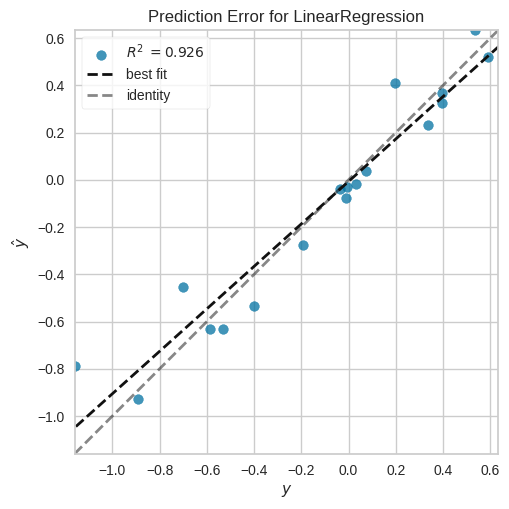

In [ ]:
from yellowbrick.regressor import PredictionError, ResidualsPlot  # Import yellowbrick's PredictionError and ResidualsPlot classes

# Create a PredictionError visualizer for the linear regression model (lm5) using the training data
# PredictionError visualizer shows the difference between predicted and actual values
visualizer = PredictionError(lm2).fit(x_train, y_train)

# Score the visualizer on the test data to further assess model performance
visualizer.score(x_test, y_test)

# Display the visualizer, showing the PredictionError plot
# The poof() method is used to render and display the visualizer
visualizer.poof();
